In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
box_office = pd.read_csv('top200movies_2023.csv')

In [3]:
box_office = box_office.rename(columns={'Title': 'name'})
box_office = box_office.head(100)
box_office

,Rank,name,Theaters,Total Gross,Release Date,Distributor,Genres
0,1,Barbie,"4,337","$594,254,460",2023-07-21 00:00:00,Warner Bros.,Comedy Adventure
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",2023-04-05 00:00:00,Universal Pictures,Fantasy Animation Comedy Family Adventure
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",2023-06-02 00:00:00,Columbia Pictures,Animation Adventure Sci-Fi Action
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",2023-05-05 00:00:00,Walt Disney Studios Motion Pictures,Adventure Action Sci-Fi
4,5,Oppenheimer,"3,761","$300,144,670",2023-07-21 00:00:00,Universal Pictures,Drama History
...,...,...,...,...,...,...,...
95,96,Violent Night,"3,723","$50,057,405",2023-12-02 00:00:00,Universal Pictures,Crime Fantasy Comedy Action
96,97,2023 Oscar Nominated Short Films: Live Action,357,"$3,025,631",2023-02-17 00:00:00,ShortsTV,N/A
97,98,Living,644,"$3,038,113",2023-12-23 00:00:00,Sony Pictures Classics,Drama
98,99,The Menu,"3,228","$38,501,125",2023-11-18 00:00:00,Searchlight Pictures,Comedy Horror Thriller


In [4]:
box_office[box_office['Genres'].str.contains('Action')].count()

Rank            35
name            35
Theaters        35
Total Gross     35
Release Date    35
Distributor     35
Genres          35
dtype: int64

In [5]:
all_words = ' '.join(box_office['Genres']).split()

# Extract unique words
unique_words = set(all_words)

print(unique_words)

# 17 genres, not including 'None'; therefore k should = 17

{'Horror', 'Animation', 'Crime', 'Mystery', 'Music', 'Drama', 'Adventure', 'Romance', 'Thriller', 'Family', 'Documentary', 'N/A', 'History', 'Fantasy', 'War', 'Action', 'Sci-Fi', 'Comedy'}


In [6]:
genres_to_cluster_by = ['History', 'Adventure', 'Action', 'Animation', 'Mystery', 'Drama', 
                        'Documentary', 'Horror', 'Sci-Fi', 'Music', 'Comedy', 'Fantasy', 
                        'Crime', 'War', 'Romance', 'Family', 'Thriller']

clusters = {genre: [] for genre in genres_to_cluster_by}

# Iterate through each movie and assign it to clusters based on its genres
for index, row in box_office.iterrows():
    for genre in genres_to_cluster_by:
        if genre in row['Genres']:
            clusters[genre].append(row['Genres'])

# Print the clusters
for genre, movies in clusters.items():
    print(f"Cluster '{genre}':")
    for movie_genres in movies:
        print(f"  - {movie_genres}")

Cluster 'History':
  - Drama History 
  - Drama History 
  - Drama History Music 
  - Drama History 
  - Music Drama History 
  - History Drama 
Cluster 'Adventure':
  - Comedy Adventure 
  - Fantasy Animation Comedy Family Adventure 
  - Animation Adventure Sci-Fi Action 
  - Adventure Action Sci-Fi 
  - Family Fantasy Romance Adventure 
  - Action Adventure Sci-Fi 
  - Adventure Sci-Fi Action 
  - Action Adventure 
  - Action Sci-Fi Adventure 
  - Animation Comedy Romance Fantasy Family Adventure 
  - Animation Family Fantasy Action Comedy Adventure 
  - Sci-Fi Action Adventure 
  - Comedy Fantasy Adventure 
  - Action Sci-Fi Adventure 
  - Action Adventure Drama 
  - Adventure Drama Action Thriller 
  - Adventure Sci-Fi Action 
  - Adventure Comedy 
  - Animation Drama Fantasy Adventure 
  - Animation Action Thriller Adventure Fantasy 
  - Sci-Fi Action Adventure 
  - Fantasy Comedy Adventure 
  - Adventure War Action 
  - Action Sci-Fi Adventure 
  - Comedy Action Adventure Thrille

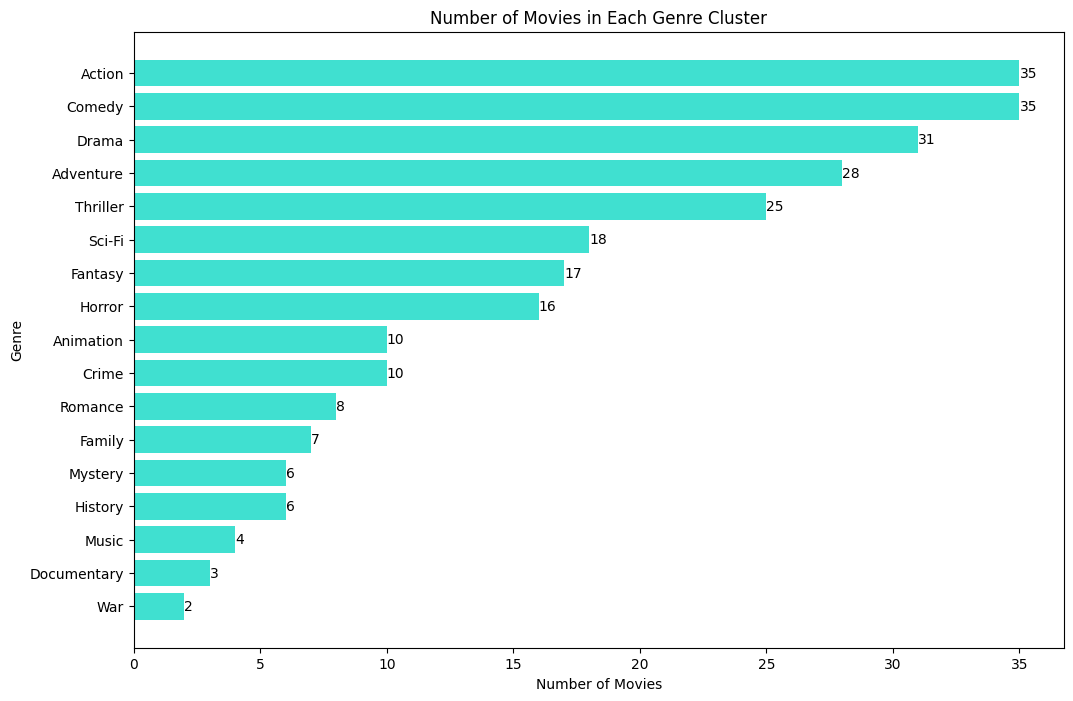

In [7]:
clusters_df = pd.DataFrame({'Genre': list(clusters.keys()), 'Count': [len(movies) for movies in clusters.values()]})

# Sort DataFrame by count in descending order for better visualization
clusters_df = clusters_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(clusters_df['Genre'], clusters_df['Count'], color='turquoise')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Number of Movies in Each Genre Cluster')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common genre at the top

# Add count labels to the end of each bar
for bar, count in zip(bars, clusters_df['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.show()

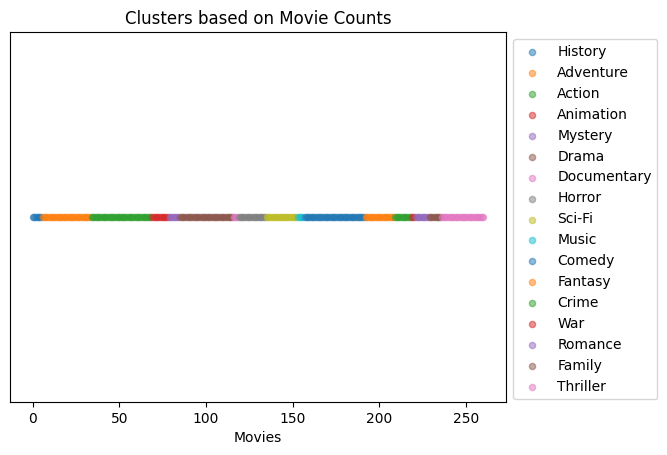

In [8]:
plot_data = []
genre_labels = []

y_counter = 0

for genre, movies in clusters.items():
    count = len(movies)
    plt.scatter(range(y_counter, y_counter + count), [0] * count, s=20, label=genre, alpha=0.5)
    y_counter += count

plt.xlabel('Movies')
plt.title('Clusters based on Movie Counts')
plt.yticks([])  
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

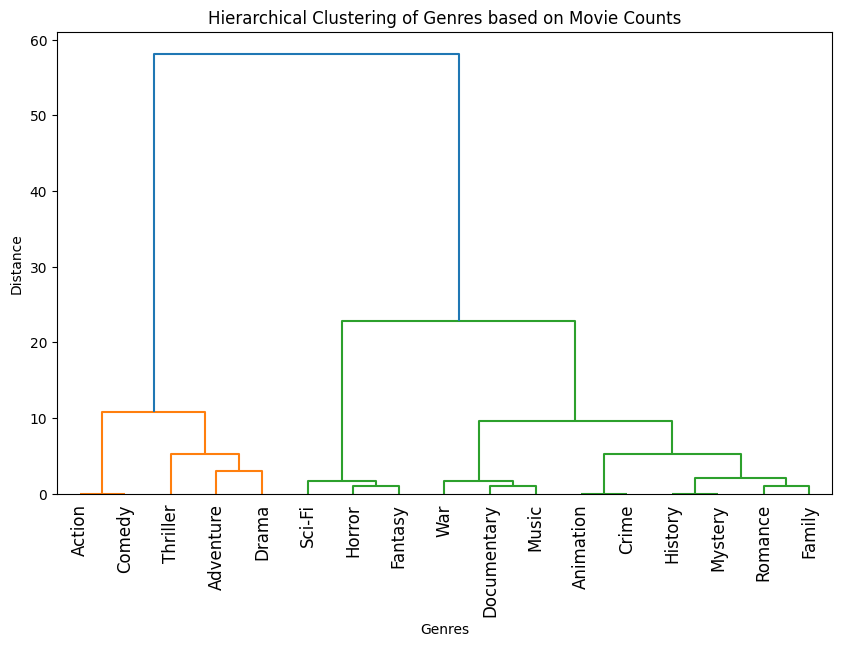

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
counts = np.array([len(movies) for genre, movies in clusters.items()])

# Perform hierarchical clustering
Z = linkage(counts.reshape(-1, 1), 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=list(clusters.keys()), leaf_rotation=90)
plt.xlabel('Genres')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering of Genres based on Movie Counts')
plt.show()

In [10]:
genres_list = box_office['Genres'].tolist()
genres_list

['Comedy Adventure ',
 'Fantasy Animation Comedy Family Adventure ',
 'Animation Adventure Sci-Fi Action ',
 'Adventure Action Sci-Fi ',
 'Drama History ',
 'Family Fantasy Romance Adventure ',
 'Action Adventure Sci-Fi ',
 'Adventure Sci-Fi Action ',
 'Action Thriller Crime ',
 'Drama Action ',
 'Action Adventure ',
 'Action Thriller ',
 'Action Sci-Fi Adventure ',
 'Drama Action ',
 'Animation Comedy Romance Fantasy Family Adventure ',
 'Action Crime Thriller ',
 'Animation Family Fantasy Action Comedy Adventure ',
 'Crime Horror Thriller ',
 'Sci-Fi Action Adventure ',
 'Action Comedy Animation Sci-Fi ',
 'Horror Sci-Fi ',
 'Comedy Fantasy Adventure ',
 'Horror Thriller Mystery ',
 'Action Horror Sci-Fi ',
 'Horror Thriller ',
 'Crime Comedy Thriller ',
 'Drama Comedy ',
 'Horror Comedy Fantasy Family ',
 'Fantasy Action Comedy ',
 'Drama ',
 'Drama History ',
 'Comedy Romance ',
 'Action Sci-Fi Adventure ',
 'Mystery Horror Thriller ',
 'Horror Thriller ',
 'Comedy Drama ',
 'Myste

In [11]:
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genres_list)

distances = euclidean_distances(genre_matrix)

print("Pairwise Euclidean distances between movies:")
print(distances)

Pairwise Euclidean distances between movies:
[[0.         2.23606798 2.82842712 ... 3.46410162 3.16227766 3.46410162]
 [2.23606798 0.         2.64575131 ... 3.87298335 3.31662479 3.31662479]
 [2.82842712 2.64575131 0.         ... 3.74165739 4.         3.74165739]
 ...
 [3.46410162 3.87298335 3.74165739 ... 0.         3.46410162 2.44948974]
 [3.16227766 3.31662479 4.         ... 3.46410162 0.         3.16227766]
 [3.46410162 3.31662479 3.74165739 ... 2.44948974 3.16227766 0.        ]]


In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import euclidean_distances

movies = box_office['name'].tolist()
genres_list = box_office['Genres'].tolist()

# Use MultiLabelBinarizer to convert genres into binary matrix
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(genres_list)

# Compute pairwise Euclidean distances between movies based on genre presence
distances = euclidean_distances(genre_matrix)

# Create a DataFrame with movie names as both row and column names
distances_df = pd.DataFrame(distances, index=movies, columns=movies)

# Print the pairwise Euclidean distances with movie names as row and column names
print("Pairwise Euclidean distances between movies:")
print(distances_df)

Pairwise Euclidean distances between movies:
                                                 Barbie  \
Barbie                                         0.000000   
The Super Mario Bros. Movie                    2.236068   
Spider-Man: Across the Spider-Verse            2.828427   
Guardians of the Galaxy Vol. 3                 2.828427   
Oppenheimer                                    3.464102   
...                                                 ...   
Violent Night                                  2.645751   
2023 Oscar Nominated Short Films: Live Action  3.605551   
Living                                         3.464102   
The Menu                                       3.162278   
The Hill                                       3.464102   

                                               The Super Mario Bros. Movie  \
Barbie                                                            2.236068   
The Super Mario Bros. Movie                                       0.000000   
Spider-Man: 

In [13]:
euclidean_distance = pd.DataFrame(distances_df, index=box_office['name'], columns=box_office['name'])
euclidean_distance

name,Barbie,The Super Mario Bros. Movie,Spider-Man: Across the Spider-Verse,Guardians of the Galaxy Vol. 3,Oppenheimer,The Little Mermaid,Avatar: The Way of Water,Ant-Man and the Wasp: Quantumania,John Wick: Chapter 4,Sound of Freedom,...,The Journey: A Music Special from Andrea Bocelli,Chevalier,Mafia Mamma,The Wandering Earth II,A Thousand and One,Violent Night,2023 Oscar Nominated Short Films: Live Action,Living,The Menu,The Hill
name,,,,,,,,,,,,,,,,,,,,,
Barbie,0.000000,2.236068,2.828427,2.828427,3.464102,2.828427,2.828427,2.828427,3.000000,3.162278,...,3.162278,3.605551,2.000000,4.123106,3.316625,2.645751,3.605551,3.464102,3.162278,3.464102
The Super Mario Bros. Movie,2.236068,0.000000,2.645751,3.000000,3.316625,1.732051,3.000000,3.000000,3.162278,3.316625,...,3.000000,3.464102,2.645751,4.242641,3.464102,2.000000,4.242641,3.872983,3.316625,3.316625
Spider-Man: Across the Spider-Verse,2.828427,2.645751,0.000000,1.414214,3.741657,2.449490,1.414214,1.414214,3.316625,2.828427,...,3.162278,3.605551,2.828427,3.316625,3.605551,2.645751,4.123106,3.741657,4.000000,3.741657
Guardians of the Galaxy Vol. 3,2.828427,3.000000,1.414214,0.000000,4.000000,2.828427,0.000000,0.000000,3.316625,3.162278,...,3.464102,3.872983,2.828427,3.000000,3.872983,3.000000,3.872983,4.000000,4.000000,4.000000
Oppenheimer,3.464102,3.316625,3.741657,4.000000,0.000000,3.464102,4.000000,4.000000,3.605551,2.449490,...,2.449490,1.732051,3.162278,3.605551,2.645751,3.000000,3.605551,2.449490,3.162278,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violent Night,2.645751,2.000000,2.645751,3.000000,3.000000,2.236068,3.000000,3.000000,2.828427,2.645751,...,2.645751,3.162278,1.732051,3.741657,3.162278,0.000000,4.000000,3.605551,3.316625,3.000000
2023 Oscar Nominated Short Films: Live Action,3.605551,4.242641,4.123106,3.872983,3.605551,4.358899,3.872983,3.872983,3.741657,3.316625,...,4.123106,4.000000,3.605551,2.828427,3.162278,4.000000,0.000000,2.645751,3.872983,3.605551
Living,3.464102,3.872983,3.741657,4.000000,2.449490,4.000000,4.000000,4.000000,3.605551,2.449490,...,3.162278,3.000000,3.464102,3.000000,1.732051,3.605551,2.645751,0.000000,3.464102,2.449490


In [14]:
box_office.head(10)

,Rank,name,Theaters,Total Gross,Release Date,Distributor,Genres
0,1,Barbie,"4,337","$594,254,460",2023-07-21 00:00:00,Warner Bros.,Comedy Adventure
1,2,The Super Mario Bros. Movie,"4,371","$574,759,600",2023-04-05 00:00:00,Universal Pictures,Fantasy Animation Comedy Family Adventure
2,3,Spider-Man: Across the Spider-Verse,"4,332","$381,178,195",2023-06-02 00:00:00,Columbia Pictures,Animation Adventure Sci-Fi Action
3,4,Guardians of the Galaxy Vol. 3,"4,450","$358,995,815",2023-05-05 00:00:00,Walt Disney Studios Motion Pictures,Adventure Action Sci-Fi
4,5,Oppenheimer,"3,761","$300,144,670",2023-07-21 00:00:00,Universal Pictures,Drama History
5,6,The Little Mermaid,"4,320","$297,895,447",2023-05-26 00:00:00,Walt Disney Studios Motion Pictures,Family Fantasy Romance Adventure
6,7,Avatar: The Way of Water,"4,340","$684,075,767",2023-12-16 00:00:00,20th Century Studios,Action Adventure Sci-Fi
7,8,Ant-Man and the Wasp: Quantumania,"4,345","$214,504,909",2023-02-17 00:00:00,Walt Disney Studios Motion Pictures,Adventure Sci-Fi Action
8,9,John Wick: Chapter 4,"3,855","$187,131,806",2023-03-24 00:00:00,Lionsgate,Action Thriller Crime
9,10,Sound of Freedom,"3,411","$180,587,629",2023-07-04 00:00:00,Angel Studios,Drama Action


In [19]:
for word in genres_to_cluster_by:
    counts = box_office['Genres'].str.contains(word).sum()
    print(f"Occurrences of '{word}': {counts}")

Occurrences of 'History': 6
Occurrences of 'Adventure': 28
Occurrences of 'Action': 35
Occurrences of 'Animation': 10
Occurrences of 'Mystery': 6
Occurrences of 'Drama': 31
Occurrences of 'Documentary': 3
Occurrences of 'Horror': 16
Occurrences of 'Sci-Fi': 18
Occurrences of 'Music': 4
Occurrences of 'Comedy': 35
Occurrences of 'Fantasy': 17
Occurrences of 'Crime': 10
Occurrences of 'War': 2
Occurrences of 'Romance': 8
Occurrences of 'Family': 7
Occurrences of 'Thriller': 25
